# File Processing

In [20]:
from scipy.io import arff
import pandas as pd
import sys, getopt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
# Step 1 -  . Convert to csv and load data 

def arff2csv(arff_path, csv_path=None, _encoding='utf8'):
    with open(arff_path, 'r', encoding=_encoding) as fr:
        attributes = []
        if csv_path is None:
            csv_path = arff_path[:-4] + 'csv'  # *.arff -> *.csv
        write_sw = False
        with open(csv_path, 'w', encoding=_encoding) as fw:
            for line in fr.readlines():
                if write_sw:
                    fw.write(line)
                elif '@data' in line:
                    fw.write(','.join(attributes) + '\n')
                    write_sw = True
                elif '@attribute' in line:
                    attributes.append(line.split()[1])  # @attribute attribute_tag numeric
    print("Convert {} to {}.".format(arff_path, csv_path))

arff2csv('Behavior of the urban traffic - modified.arff', 'Behavior of the urban traffic - modified.csv')

pd.set_option('display.max_columns', None)
df = pd.read_csv('Behavior of the urban traffic - modified.csv');

Convert Behavior of the urban traffic - modified.arff to Behavior of the urban traffic - modified.csv.


# Data pre-processing

#### 1. Identify data quality issues and resolve.

Data quality issues may include:
1. Missing values
2. Duplicate records
3. Inconsistent/invalid data
4. Noise
5. Outliers

In [21]:
df.describe()

,Immobilized_bus,Broken_Truck,Occurrence_involving_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Tree_on_the_road,Intermittent_Semaphore,Slowness_in_traffic_percent
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.335714,8.007143,0.007143,0.114286,0.007143,14.400000,0.035714,0.042857,0.014286,9.980714
std,0.652728,84.448912,0.084515,0.495820,0.084515,169.022573,0.221529,0.203262,0.119092,4.323583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,3.400000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.300000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.950000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.500000
max,4.000000,1000.000000,1.000000,4.000000,1.000000,2000.000000,1.000000,1.000000,1.000000,23.400000


In [22]:
df.head(20)

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7:00,0.0,0.0,T,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,7:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1
5,9:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9
6,10:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3
7,10:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2
8,11:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.6
9,11:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4


In [23]:
df.tail(n = 20)

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
120,11:00,0.0,2.0,F,0.0,1.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9
121,11:30,0.0,1.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.3
122,12:00,0.0,2.0,F,,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.9
123,12:30,2.0,0.0,T,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.3
124,13:00,0.0,1.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0
125,13:30,0.0,1.0,F,0.0,0.0,NO,0.0,,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.7
126,14:00,1.0,2.0,F,1.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10.3
127,14:30,0.0,0.0,F,1.0,0.0,NO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9
128,15:00,0.0,1.0,F,1.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.9
129,15:30,2.0,0.0,F,1.0,-1.0,NO,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4


#### 2. Data transformation

In [24]:
print(df.dtypes)

# Remove trailing and leading spaces from field values.

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Mapping values in certain features

df['Fire_vehicles'] = df['Fire_vehicles'].map({'YES': 1, 'NO': 0});

#df['Vehicle_excess'] = df['Vehicle_excess'].map({'T': 1, 'F': 0,'t': 1, 'f': 0,'NO': 0, 'YES': 1  })
TO_CLARIFY : Why do we need to transform the values for 'Vehicle_excess' ? It has discrete boolean values.
    
df['Running_over'] = df['Running_over'].replace({'NO': 0, 'YES': 1})
df['Hour'] = df['Hour'].map({'7:00':1,'7:30':2,'8:00':3,'8:30':4,'9:00':5,'9:30':6,'10:00':7,'10:30':8,'11:00':9,'11:30':10,'12:00':11,'12:30':12,'13:00':13,'13:30':14,'14:00':15,
                             '14:30':16,'15:00':17,'15:30':18,'15:30':19,'16:00':20,'16:30':21,'17:00':22,'17:30':23,'18:00':24,
                             '18:30':25,'19:00':26,'19:30':27,'20:00':28})


Hour                                      object
Immobilized_bus                          float64
Broken_Truck                             float64
Vehicle_excess                            object
Accident_victim                           object
Running_over                              object
Fire_vehicles                             object
Occurrence_involving_freight             float64
Incident_involving_dangerous_freight      object
Lack_of_electricity                      float64
Fire                                     float64
Point_of_flooding                        float64
Manifestations                           float64
Defect_in_the_network_of_trolleybuses     object
Tree_on_the_road                         float64
Semaphore_off                             object
Intermittent_Semaphore                   float64
Slowness_in_traffic_percent              float64
dtype: object


#### 3. Identify features with missing values

#### 4. Check the distribution of missing values for each feature : Visualisation

#### 5. Discover the missing value mechanism in each feature [Through t-tests & chi-squared test], and identify appropriate imputation technique on a case to case basis.

#### 6. Impute the missing values if required, else ignore.

#### 7. Check for outliers using Boxplot

<Figure size 432x288 with 0 Axes>

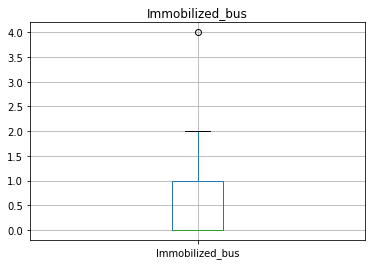

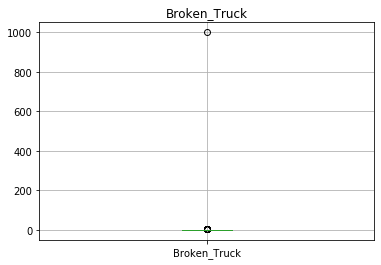

<Figure size 432x288 with 0 Axes>

In [27]:
df.boxplot(column=['Immobilized_bus'])
plt.title('Immobilized_bus')
plt.figure()

boxplot = df.boxplot(column=['Broken_Truck'])
plt.title('Broken_Truck')
plt.figure()





#### 8. Remove outliers

#### 9. Feature selection : Collinearity among features using covariance matrix

# Identification of factors causing traffic slowness

#### 1. Dimensionality reduction using PCA

######  2. t-SNE Plot visualisation

#### 3. Visualisation : Univariate

#### 4. Visualisation : bi-variate